In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('data/train.csv')

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

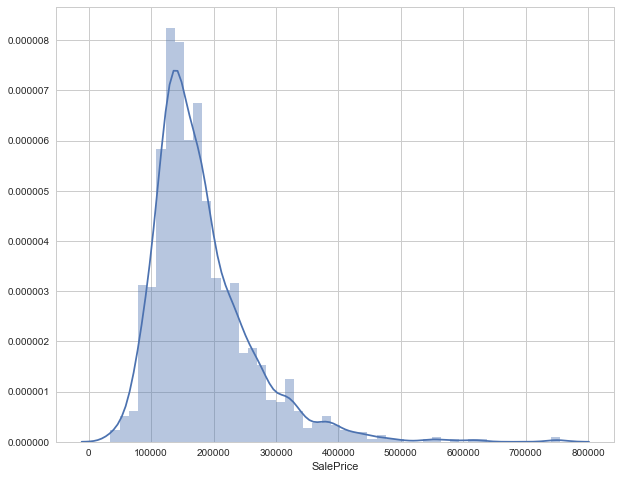

In [5]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['SalePrice']);

In [6]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


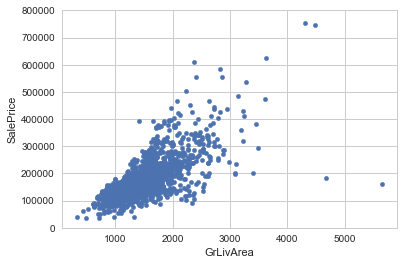

In [7]:
var = 'GrLivArea'
plt.figure(figsize=(10,8))
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

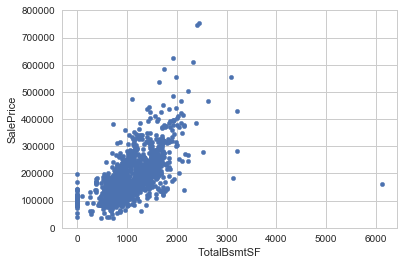

In [8]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

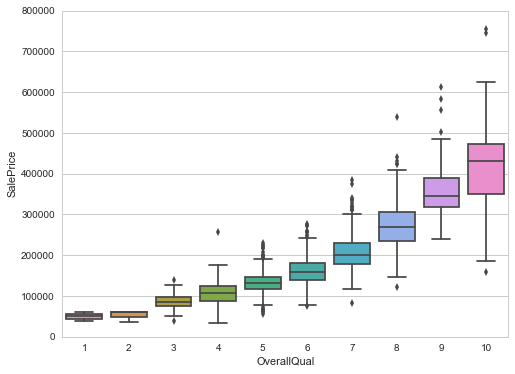

In [9]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

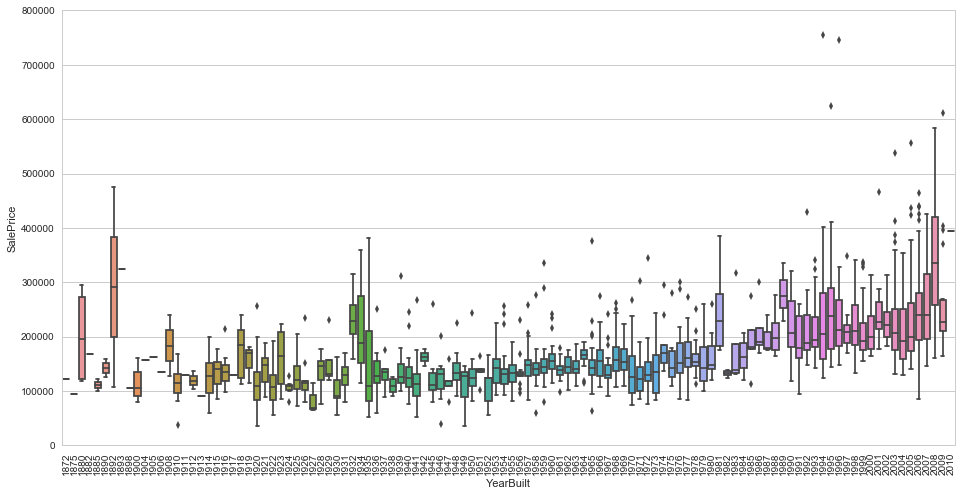

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

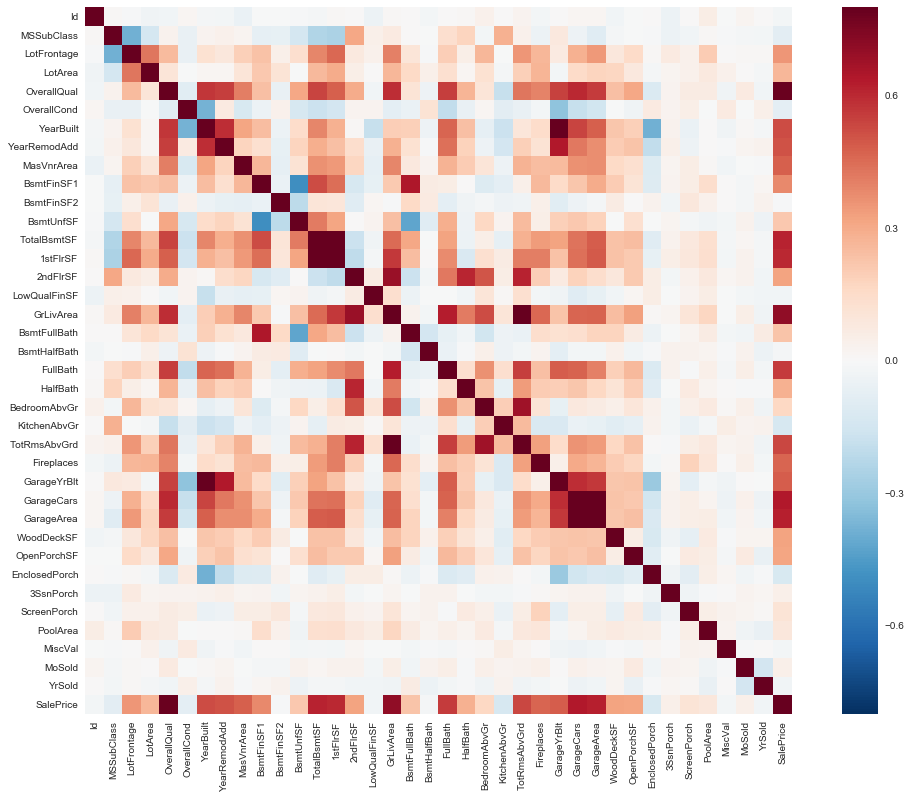

In [11]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(corrmat, vmax=.8, square=True);

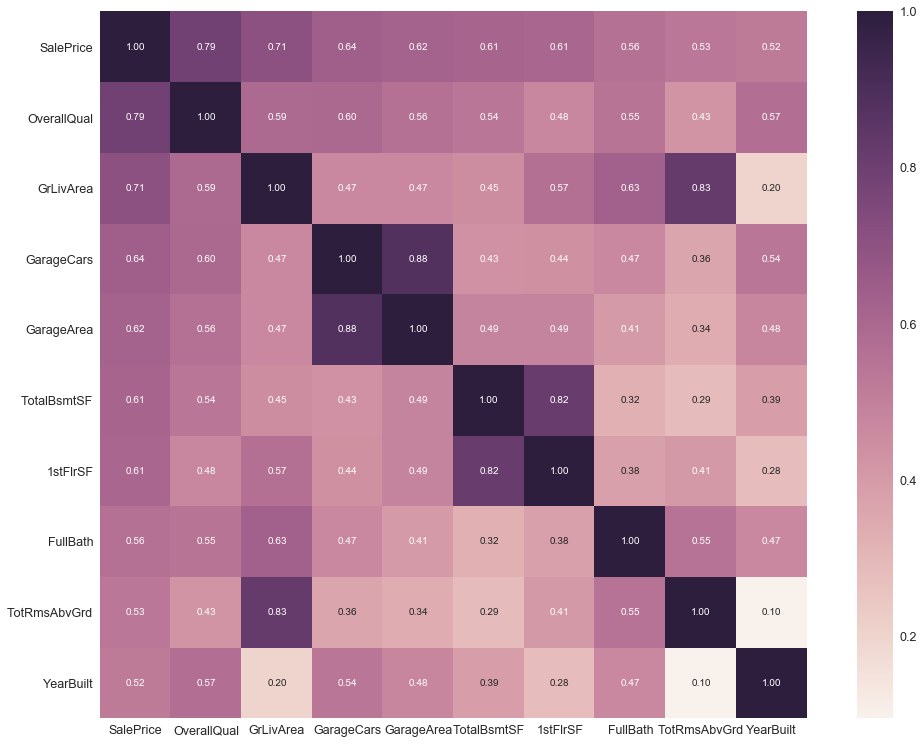

In [12]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(18, 13))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

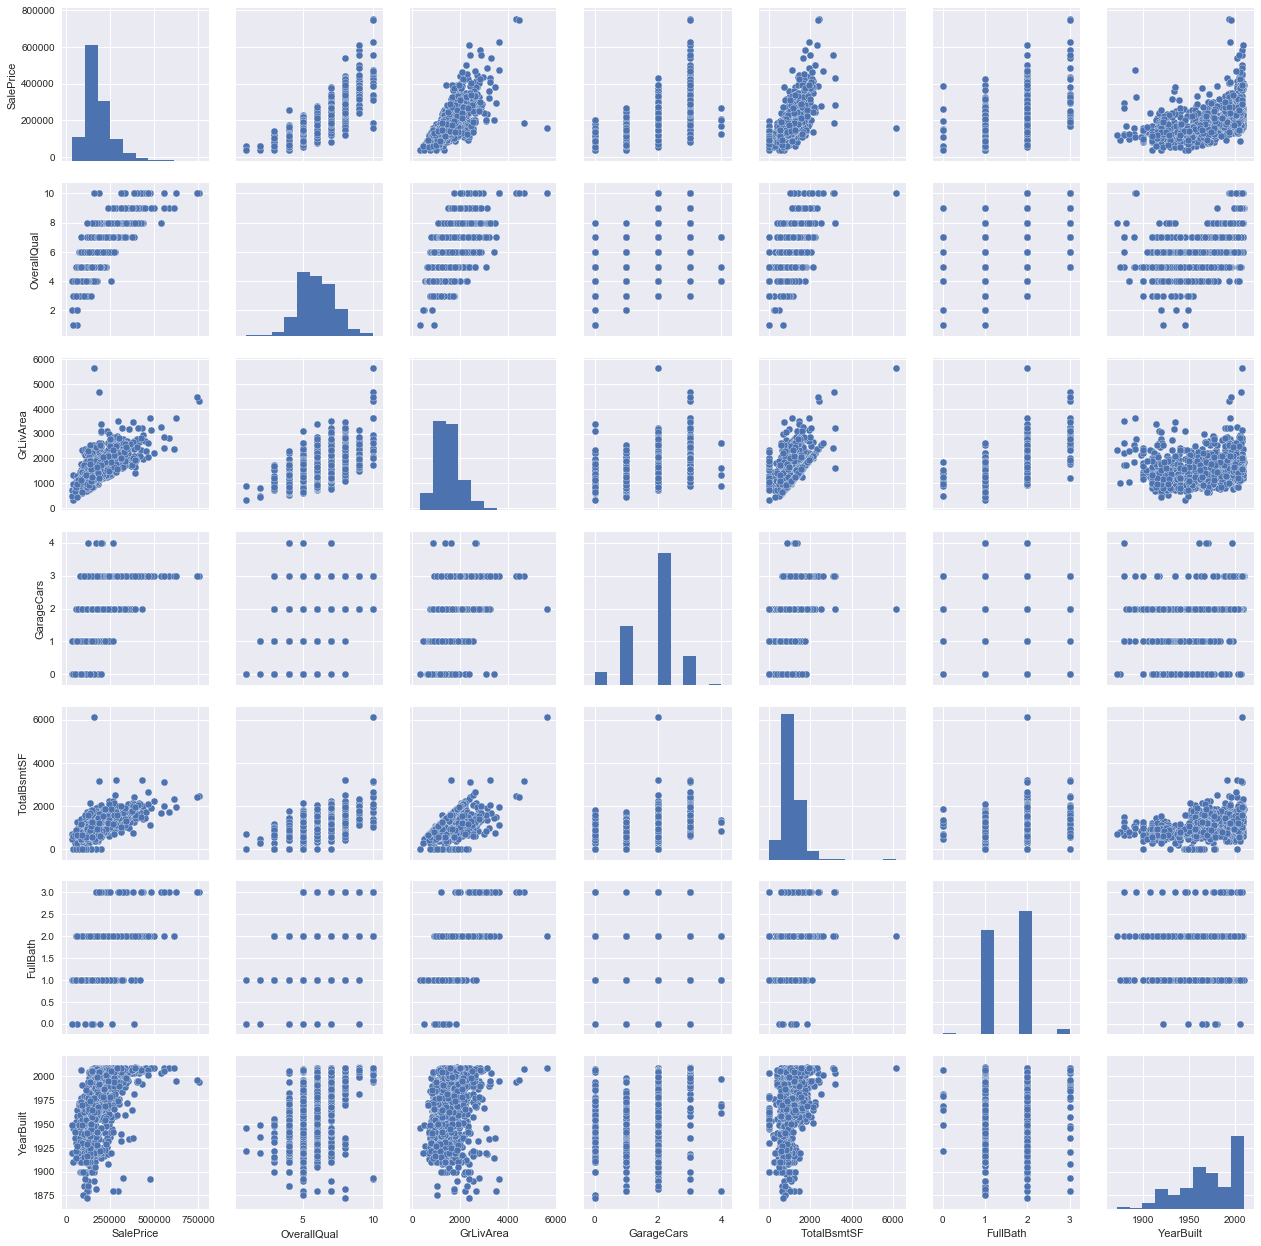

In [13]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [14]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [15]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [16]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


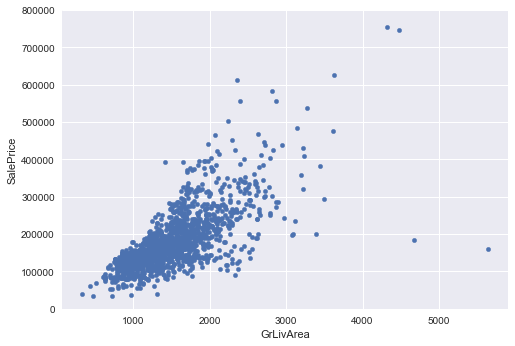

In [17]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [18]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

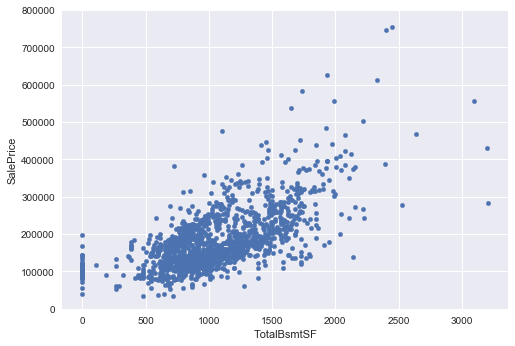

In [19]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

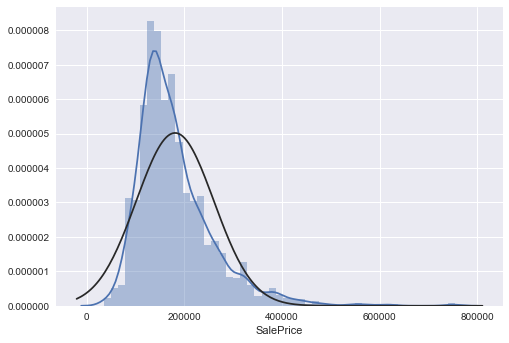

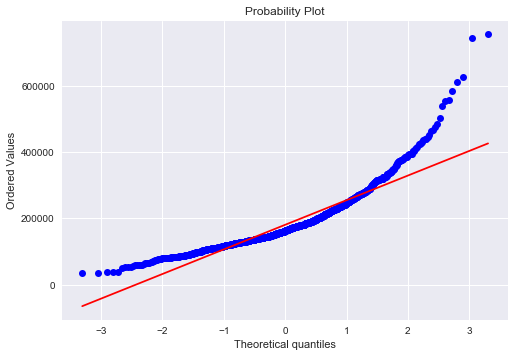

In [20]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [21]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

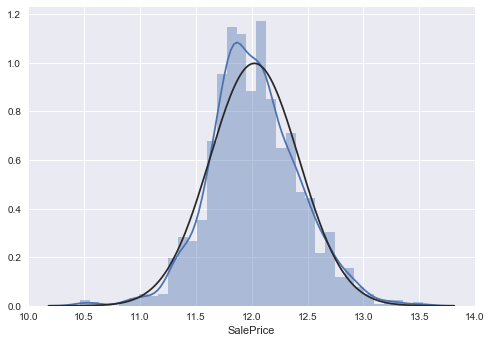

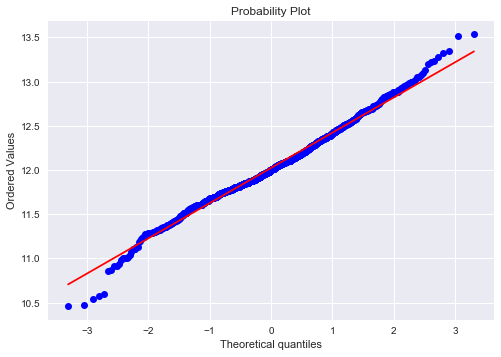

In [22]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

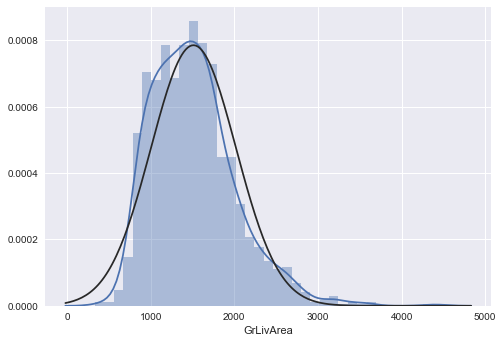

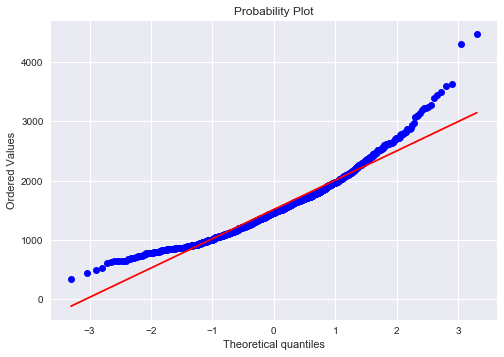

In [23]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [24]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

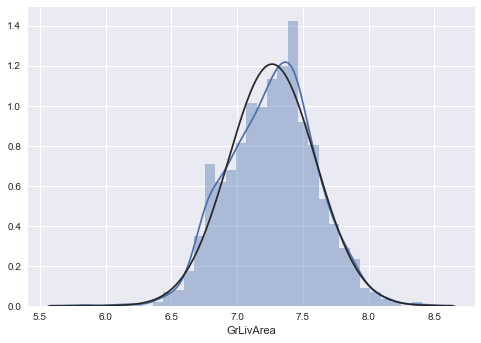

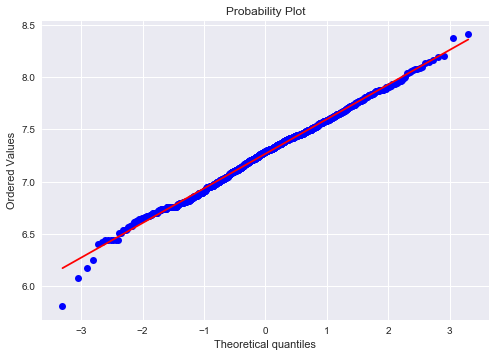

In [25]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

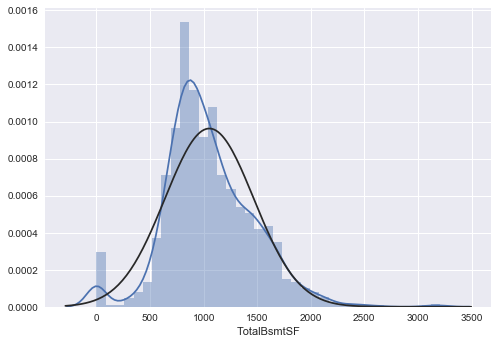

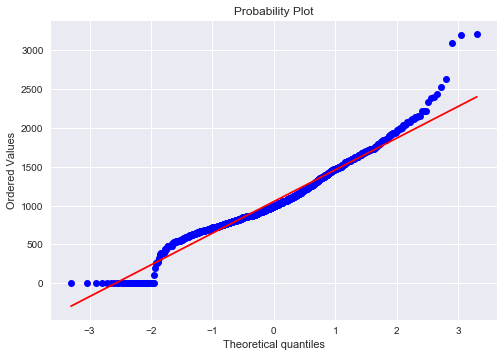

In [26]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [27]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [28]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

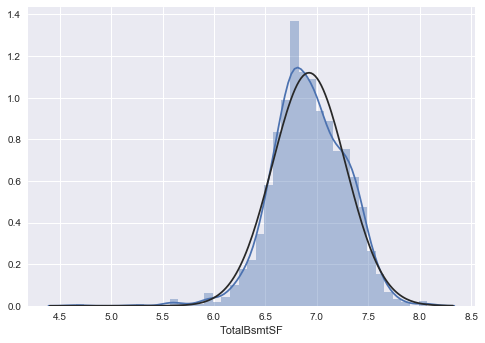

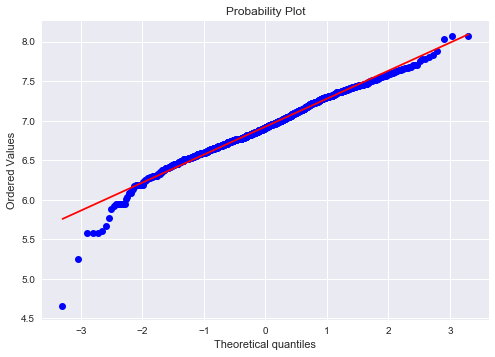

In [29]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

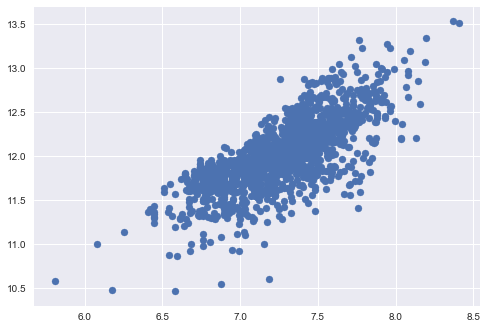

In [30]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

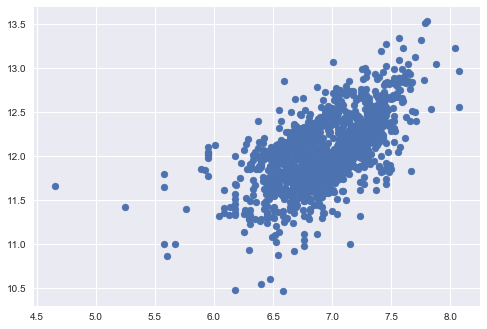

In [31]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [32]:
df_train = pd.get_dummies(df_train)

In [33]:
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [34]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn import utils

In [35]:
X_dataset = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
Y_dataset = df_train[['SalePrice']]

In [36]:
x_val = X_dataset.as_matrix(columns=None)
y_val = Y_dataset.as_matrix(columns=None)

In [37]:
print(utils.multiclass.type_of_target(y_val))

continuous


In [38]:
lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y_val)

In [39]:
model = ExtraTreesClassifier()
model.fit(x_val, y_encoded)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [40]:
print(model.feature_importances_)

[ 0.07849567  0.30267148  0.04323334  0.28754615  0.02574748  0.26230587]


In [41]:
df_train_univar = df_train[['GrLivArea', 'SalePrice']]
df_train_univar.head()

,GrLivArea,SalePrice
0,7.444249,12.247694
1,7.140453,12.109011
2,7.487734,12.317167
3,7.448334,11.849398
4,7.695303,12.429216


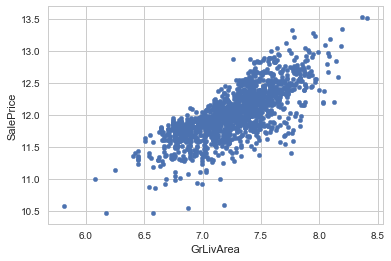

In [42]:
df_train_univar.plot(x = 'GrLivArea', y = 'SalePrice', kind = 'scatter')

In [43]:
X = df_train_univar.drop(['SalePrice'], axis=1)
y = df_train_univar.drop(['GrLivArea'], axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [45]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
model_score1 = regression_model.score(X_test, y_test)

In [47]:
y_predict = regression_model.predict(X_test)
regression_model_mse_1 = mean_squared_error(y_predict, y_test)

In [48]:
rmse_1 = math.sqrt(regression_model_mse_1)

In [49]:
print (f'Regression Model Score: {model_score1} | Mean Squared Error: {regression_model_mse_1} | RMSE: {rmse_1}')

Regression Model Score: 0.4906262158555431 | Mean Squared Error: 0.08092736284690168 | RMSE: 0.2844773503231877


In [51]:
X_test.head()

,GrLivArea
1163,7.137278
111,7.265430
1273,7.213032
1147,7.355002
368,7.145196


In [52]:
y_test.head()

,SalePrice
1163,11.598727
111,12.100712
1273,12.083905
1147,12.069680
368,11.790557


In [53]:
regression_model.predict([[2000]])

array([[ 1824.49923185]])

In [54]:
prediction = []

for row in X_test.iterrows():
    index, data = row
    pred = regression_model.predict([data.tolist()])
    prediction.append(pred[0][0])
    
actual = list(y_test['SalePrice'].values)

In [55]:
df_results = pd.concat([X_test, y_test], axis=1)

In [56]:
prediction_series = pd.Series(prediction)
df_results['SalePrice-Predicted'] = prediction_series.values

In [57]:
df_results.head()

,GrLivArea,SalePrice,SalePrice-Predicted
1163,7.137278,11.598727,11.913184
111,7.265430,12.100712,12.029743
1273,7.213032,12.083905,11.982084
1147,7.355002,12.069680,12.111212
368,7.145196,11.790557,11.920385


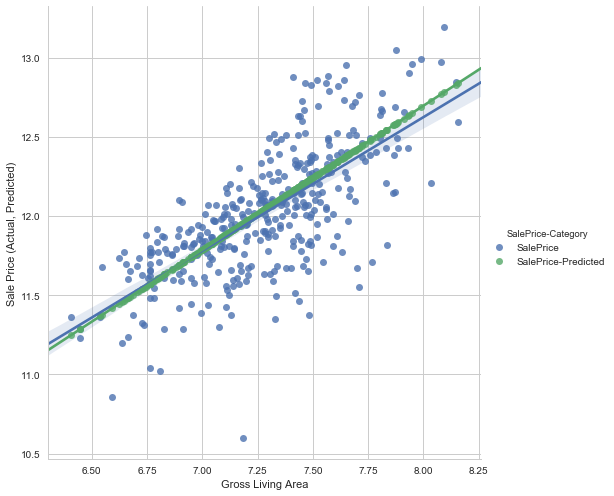

In [58]:
df_results = pd.melt(df_results, id_vars=[ 'GrLivArea'], var_name='SalePrice-Category')
g = sns.lmplot(x='GrLivArea', y='value', hue='SalePrice-Category', data=df_results, fit_reg=True, size=7)
g.set_axis_labels('Gross Living Area', 'Sale Price (Actual, Predicted)')

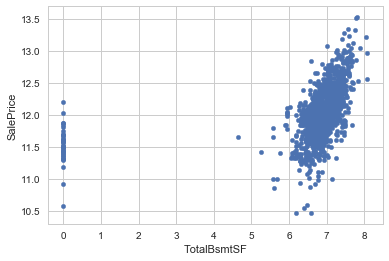

In [59]:
df_train_2var = df_train[['GrLivArea', 'TotalBsmtSF', 'SalePrice']]
df_train_2var.plot(x = 'TotalBsmtSF', y = 'SalePrice', kind = 'scatter')

In [60]:
X = df_train_2var.drop(['SalePrice'], axis=1)
y = df_train_2var.drop(['GrLivArea', 'TotalBsmtSF'], axis=1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [62]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
model_score2 = regression_model.score(X_test, y_test)

In [64]:
y_predict = regression_model.predict(X_test)
regression_model_mse_2 = mean_squared_error(y_predict, y_test)

In [65]:
rmse_2 = math.sqrt(regression_model_mse_2)

In [66]:
print (f'Regression Model Score: {model_score2} | Mean Squared Error: {regression_model_mse_2} | RMSE: {rmse_2}')

Regression Model Score: 0.5584015698533733 | Mean Squared Error: 0.070159473262101 | RMSE: 0.26487633579106495


In [67]:
prediction = []

for row in X_test.iterrows():
    index, data = row
    pred = regression_model.predict([data.tolist()])
    prediction.append(pred[0][0])
    
actual = list(y_test['SalePrice'].values)

In [68]:
df_results = pd.concat([X_test, y_test], axis=1)

In [69]:
prediction_series = pd.Series(prediction)
df_results['SalePrice-Predicted'] = prediction_series.values

In [70]:
df_results.head()

,GrLivArea,TotalBsmtSF,SalePrice,SalePrice-Predicted
1163,7.137278,7.088409,11.598727,11.946867
111,7.265430,5.950643,12.100712,11.963538
1273,7.213032,6.926577,12.083905,11.997991
1147,7.355002,6.556778,12.069680,12.088429
368,7.145196,7.145196,11.790557,11.958166


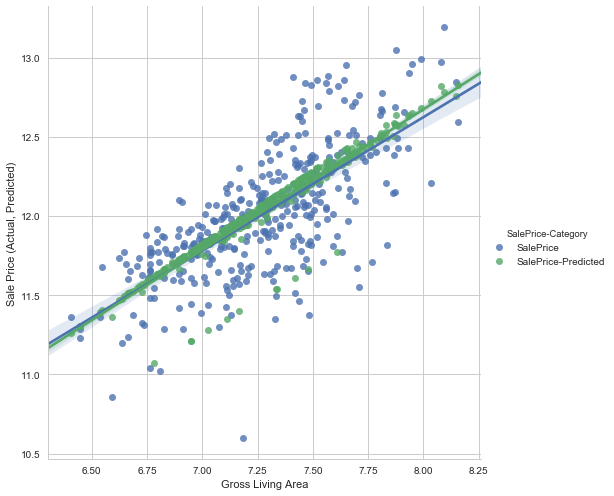

In [71]:
df_results = pd.melt(df_results, id_vars=[ 'GrLivArea', 'TotalBsmtSF'], var_name='SalePrice-Category')
g = sns.lmplot(x='GrLivArea', y='value', hue='SalePrice-Category', data=df_results, fit_reg=True, size=7)
g.set_axis_labels('Gross Living Area', 'Sale Price (Actual, Predicted)')

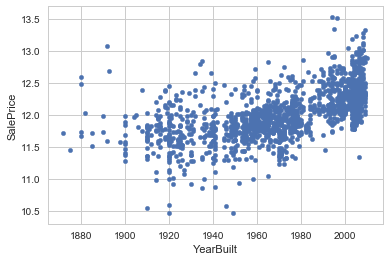

In [72]:
df_train_3var = df_train[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'SalePrice']]
df_train_3var.plot(x = 'YearBuilt', y = 'SalePrice', kind = 'scatter')

In [73]:
X = df_train_3var.drop(['SalePrice'], axis=1)
y = df_train_3var.drop(['GrLivArea', 'TotalBsmtSF', 'YearBuilt'], axis=1)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [75]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
model_score3 = regression_model.score(X_test, y_test)

In [77]:
y_predict = regression_model.predict(X_test)
regression_model_mse_3 = mean_squared_error(y_predict, y_test)

In [78]:
rmse_3 = math.sqrt(regression_model_mse_3)

In [79]:
print (f'Regression Model Score: {model_score3} | Mean Squared Error: {regression_model_mse_3} | RMSE: {rmse_3}')

Regression Model Score: 0.7526505108110885 | Mean Squared Error: 0.03929794285586941 | RMSE: 0.19823708748836433


In [80]:
prediction = []

for row in X_test.iterrows():
    index, data = row
    pred = regression_model.predict([data.tolist()])
    prediction.append(pred[0][0])
    
actual = list(y_test['SalePrice'].values)

In [81]:
df_results = pd.concat([X_test, y_test], axis=1)

In [82]:
prediction_series = pd.Series(prediction)
df_results['SalePrice-Predicted'] = prediction_series.values

In [83]:
df_results.head()

,GrLivArea,TotalBsmtSF,YearBuilt,SalePrice,SalePrice-Predicted
1163,7.137278,7.088409,1969,11.598727,11.940057
111,7.265430,5.950643,2000,12.100712,12.131626
1273,7.213032,6.926577,1959,12.083905,11.933512
1147,7.355002,6.556778,1941,12.069680,11.921230
368,7.145196,7.145196,1954,11.790557,11.869816


In [84]:
df_results = pd.melt(df_results, id_vars=[ 'GrLivArea', 'TotalBsmtSF', 'YearBuilt'], var_name='SalePrice-Category')

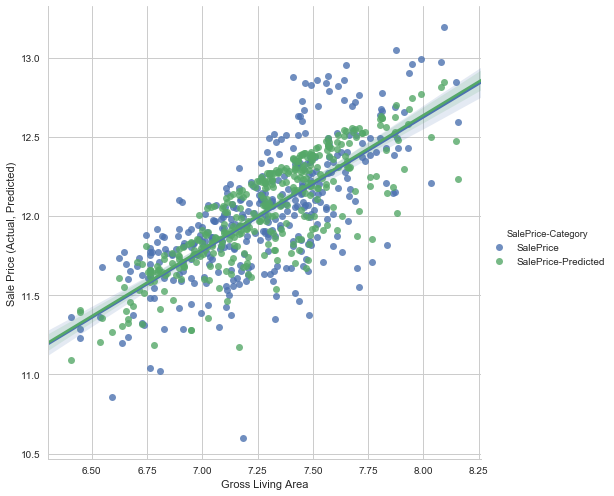

In [85]:
g = sns.lmplot(x='GrLivArea', y='value', hue='SalePrice-Category', data=df_results, fit_reg=True, size=7)
g.set_axis_labels('Gross Living Area', 'Sale Price (Actual, Predicted)')

In [86]:
Model_Score = [0.4906262158555431, 0.5584015698533733, 0.7526505108110884]
MSE_values = [0.08092736284690168, 0.070159473262101, 0.03929794285586942]
RMSE_values = [0.2844773503231877, 0.26487633579106495, 0.19823708748836436 ]

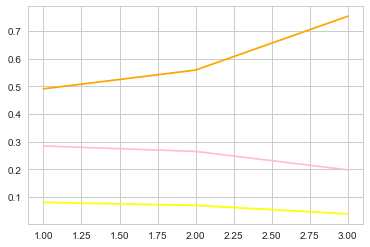

In [87]:
x = [1,2,3]

plt.plot(x, Model_Score, color = 'orange')
plt.plot(x, MSE_values, color  = 'yellow')
plt.plot(x, RMSE_values, color = 'pink')
plt.show()